In [15]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

from hmmlearn import hmm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

np.random.seed(42)

In [16]:
# nomial model
model = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
model.startprob_ = np.array([0.5, 0.5])
model.transmat_ = np.array([[0.3, 0.7],
                            [0.3, 0.7]])
model.means_ = np.array([[0.0], [5.0]])
model.covars_ = np.tile(np.identity(1), (2, 1, 1))

In [16]:
# store the model parameters

my_file = open("./Model_Parameters/N_Components.txt", "w")
my_file.write(str(model.n_components))
my_file.close()

my_file = open("./Model_Parameters/Initial_Probability_Matrix.txt", "w")
np.savetxt(my_file, model.startprob_)
my_file.close()

my_file = open("./Model_Parameters/Transition_Probability_Matrix.txt", "w")
for row in model.transmat_:
    np.savetxt(my_file, row)
my_file.close()

my_file = open("./Model_Parameters/Expectancy_Matrix.txt", "w")
for row in model.means_:
    np.savetxt(my_file, row)
my_file.close()

my_file = open("./Model_Parameters/Std_Variance_Matrix.txt", "w")
for row in model.covars_:
    np.savetxt(my_file, row)
my_file.close()

In [17]:
# generate the nomial dataset
# the nomial dataset is just the samples generated by the model
n_samples = 10
n_nomial = 100
X_temp, Z = model.sample(n_samples = n_samples, random_state = 13)
X_test_data_nomial = [X_temp]
X_test_label_nomial = [0]
# Generate samples
for i in range(n_nomial - 1):
    X_temp, Z = model.sample(n_samples = n_samples, random_state = i * 17)
    X_test_data_nomial = np.concatenate([X_test_data_nomial, [X_temp]])
    X_test_label_nomial = np.concatenate([X_test_label_nomial, [0]])

In [12]:
# abnormal model
model_anomaly = hmm.GaussianHMM(n_components = 2, covariance_type = "full")
model_anomaly.startprob_ = np.array([0.5, 0.5])
model_anomaly.transmat_ = np.array([[0.5, 0.5],
                            [0.5, 0.5]])
model_anomaly.means_ = np.array([[-5.0], [0.0]])
model_anomaly.covars_ = np.tile(np.identity(1), (2, 1, 1))

In [13]:
# generate the abnormal dataset
# the anomaly dataset is the dataset generated by a slightly different model
anomaly_portion = 0.25
n_anomaly = int(anomaly_portion * n_nomial // 1)
X_temp, Z = model_anomaly.sample(n_samples = n_samples, random_state = 13)
X_test_data_anomaly = [X_temp]
X_test_label_anomaly = [1]
# Generate samples
for i in range(n_anomaly - 1):
    X_temp, Z = model_anomaly.sample(n_samples = n_samples, random_state = i * 17)
    X_test_data_anomaly = np.concatenate([X_test_data_anomaly, [X_temp]])
    X_test_label_anomaly = np.concatenate([X_test_label_anomaly, [1]])

In [15]:
# write the samples to file
my_file = open("./dataset/Test_anomaly_set_array.txt", "w")
for row in X_test_data_nomial:
    np.savetxt(my_file, row)
for row in X_test_data_anomaly:
    np.savetxt(my_file, row)
my_file.close()
# Test_anomaly_set_array.txt is the file stores the data array

my_file = open("./dataset/Test_anomaly_set_array_size.txt", "w")
my_file.write(str(n_nomial * n_samples + n_anomaly * n_samples))
my_file.close()
# Test_anomaly_set_array_size.txt is the file stores the size of data array

my_file = open("./dataset/Test_anomaly_set_length.txt", "w")
for row in X_test_data_nomial:
    my_file.write(str(len(row)) + '\n')
for row in X_test_data_anomaly:
    my_file.write(str(len(row)) + '\n')
my_file.close()
# Test_anomaly_set_length.txt is the file stores the length array (length of each samples)

my_file = open("./dataset/Test_anomaly_set_samples.txt", "w")
my_file.write(str(len(X_test_data_nomial) + len(X_test_data_anomaly)) + '\n')
my_file.close()
# Test_anomaly_set_samples.txt is the file stores the number of samples

my_file = open("./dataset/Test_anomaly_set_label.txt", "w")
for element in X_test_label_nomial:
    my_file.write(str(int(element)) + '\n')
for element in X_test_label_anomaly:
    my_file.write(str(int(element)) + '\n')
my_file.close()
# Test_anomaly_set_label.txt is the file stores the labels of samples

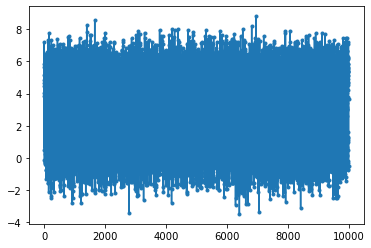

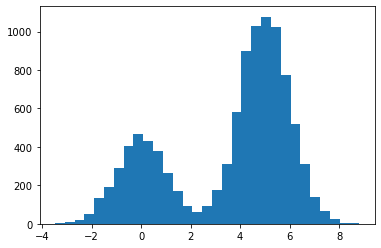

In [6]:
# graph the model-generated observations
# just for illustration, this block of code has no other use
X, Z = model.sample(n_samples = 10000, random_state = 13)
plt.plot(X[:], ".-")
plt.show()
_ = plt.hist(X, bins = 'auto')
plt.show()

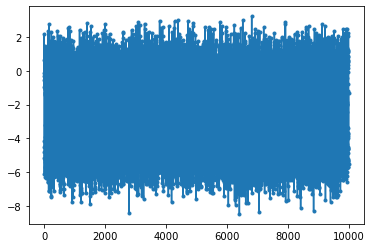

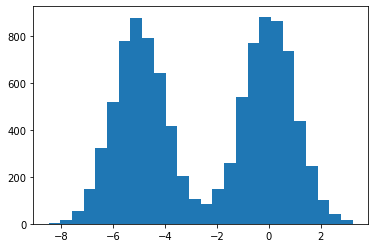

In [7]:
# graph the anomaly-model-generated observations
# just for illustration, this block of code has no other use
# also note that, the histogram shown here is not the histogram for each observation sequence
X, Z = model_anomaly.sample(n_samples = 10000, random_state = 13)
plt.plot(X[:], ".-")
plt.show()
_ = plt.hist(X, bins = 'auto')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

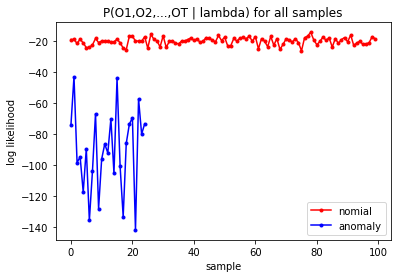

In [17]:
# Plot the log likelihood for each sample sequence
score_nomial = [model.score(X_test_data_nomial[0])]
for i in range(n_nomial - 1):
    score_nomial = np.concatenate([score_nomial, [model.score(X_test_data_nomial[i + 1])]])
plt.plot(score_nomial[:], ".-", label="nomial", color = 'r')

score_anomaly = [model.score(X_test_data_anomaly[0])]
for i in range(n_anomaly - 1):
    score_anomaly = np.concatenate([score_anomaly, [model.score(X_test_data_anomaly[i + 1])]])
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'b')   

plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples")
plt.legend()

plt.show

In [18]:
# store the LogP
my_file = open("./Result/LogP.txt", "w")
np.savetxt(my_file, score_nomial)
np.savetxt(my_file, score_anomaly)
my_file.close()

In [15]:
# train a new model
model_fit = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
model_fit.fit(X_test_data_nomial.reshape(-1,1), lengths = [len(X_test_data_nomial[i]) for i in range(np.size(X_test_data_nomial,0))])
print("\pi:")
print(model_fit.startprob_)
print("A:")
print(model_fit.transmat_)
print("\expectancy:")
print(model.means_)
print("\standard deviation:")
print(model.covars_)

\pi:
[0.47912059 0.52087941]
A:
[[0.31741323 0.68258677]
 [0.30102698 0.69897302]]
\mu:
[[0.]
 [5.]]
\Sigma:
[[[1.]]

 [[1.]]]


<function matplotlib.pyplot.show(close=None, block=None)>

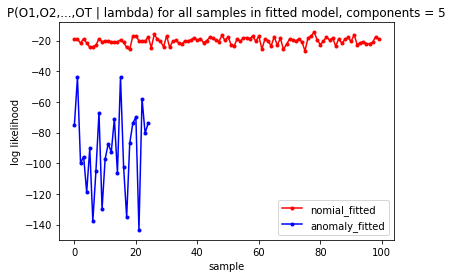

In [16]:
# Plot the log likelihood for the new model
score_nomial_fit = [model_fit.score(X_test_data_nomial[0])]
for i in range(n_nomial - 1):
    score_nomial_fit = np.concatenate([score_nomial_fit, [model_fit.score(X_test_data_nomial[i + 1])]])
plt.plot(score_nomial_fit[:], ".-", label="nomial_fitted", color = 'r')

score_anomaly_fit = [model_fit.score(X_test_data_anomaly[0])]
for i in range(n_anomaly - 1):
    score_anomaly_fit = np.concatenate([score_anomaly_fit, [model_fit.score(X_test_data_anomaly[i + 1])]])
plt.plot(score_anomaly_fit[:], ".-", label="anomaly_fitted", color = 'b')   
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O1,O2,...,OT | lambda) for all samples in fitted model, components = 5")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

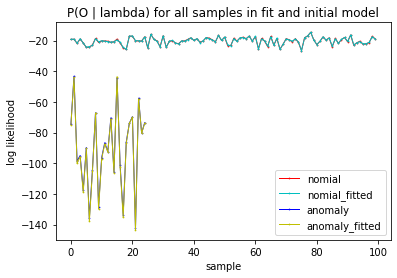

In [17]:
plt.plot(score_nomial[:], ".-", label="nomial", color = 'r', linewidth = 1, markersize = 1.5)
plt.plot(score_nomial_fit[:], ".-", label="nomial_fitted", color = 'c', linewidth = 1, markersize = 1.5)
plt.plot(score_anomaly[:], ".-", label="anomaly", color = 'b', linewidth = 1, markersize = 1.5)
plt.plot(score_anomaly_fit[:], ".-", label="anomaly_fitted", color = 'y', linewidth = 1, markersize = 1.5)
#plt.plot(score_nomial[:] - score_nomial_fit[:], ".-", label="nomial_difference", 
#color = 'm', linewidth = 1, markersize = 1.5)
#plt.plot(score_anomaly[:] - score_anomaly_fit[:], ".-", label="anoamly_difference", 
#color = 'g', linewidth = 1, markersize = 1.5)
plt.xlabel("sample")
plt.ylabel("log likelihood")
plt.title("P(O | lambda) for all samples in fit and initial model")
plt.legend()
plt.show

<BarContainer object of 3 artists>

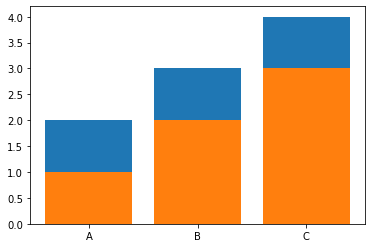

In [22]:
A = ["A","B","C"]
B = [2,3,4]
C = [1,2,3]
plt.bar(A, B)
plt.bar(A, C)

In [6]:
X_test_label_nomial

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
import sys
#Deyang path
sys.path.insert(0, 'C:\code\HMM_Anomaly_Detection_Python\script')
import DataTypeConverter as dc
print(dc.Dec2bin(1.5,4,2))

0110


In [14]:
import sys
#Tiancheng path
sys.path.insert(0, '/Users/yang/Desktop/IL2232/MyCode/PythonVersionHMM/script')
import DataTypeConverter as dc
print(dc.Dec2bin(0.08642578125,32,29))
print(dc.Dec2hex(0.08642578125,16,13))
print(dc.Dec2hex(0.078125,32,29))
print(dc.Dec2hex(0.0546875,16,13))
print(dc.Dec2hex(0.0263671875,16,13))
print(dc.Dec2hex(0.0600585938,16,13))

print("0.5 = ", dc.Dec2hex(0.5, 16, 13))
print("0.25 = ", dc.Dec2hex(0.25, 16, 13))
print("0.75 = ", dc.Dec2hex(0.75, 16, 13))
print("1 = ", dc.Dec2hex(1, 16, 13))

00000010110001000000000000000000
0x2c4
0x2800000
0x1c0
0xd8
0x1ec
0.5 =  0x1000
0.25 =  0x800
0.75 =  0x1800
1 =  0x2000
